# Problem
### Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

### Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_context("paper", rc={"figure.figsize": (6, 6)})
plt.figure(figsize=(15,6))

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [2]:
df=pd.read_csv('../data/raw/insurance.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [14]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [15]:
df.duplicated().sum()

0

In [16]:
df.drop('id',axis=1,inplace=True)

# Univariate Analysis

In [148]:
x=1
for column in df.columns:
    print(x,'-',column)
    x+=1

1 - Gender
2 - Age
3 - Driving_License
4 - Region_Code
5 - Previously_Insured
6 - Vehicle_Age
7 - Vehicle_Damage
8 - Annual_Premium
9 - Policy_Sales_Channel
10 - Vintage
11 - Response


### (1/11) -  Gender 

In [44]:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

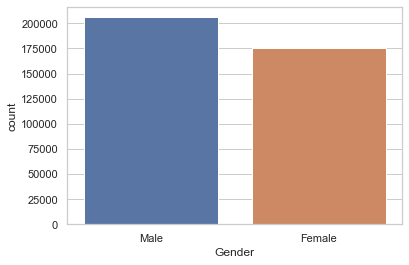

In [59]:
sns.countplot(df['Gender'])

### (2/11) -  Age 

In [7]:
df['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

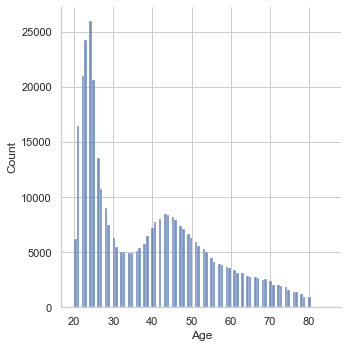

In [84]:
sns.displot(data=df, x= "Age")

* most of the ages lies between 20 and 30 
* the data shows right skweness 

<AxesSubplot:xlabel='Age', ylabel='count'>

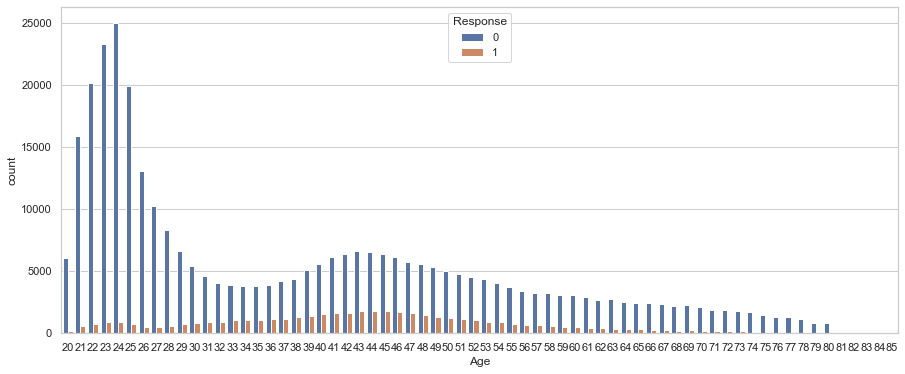

In [60]:
#the relationship between the age and responses

plt.figure(figsize=(15,6))
sns.countplot(data=df ,x='Age',hue='Response')

* the most age who responde between 43 and 45

### (3/11) -  Driving_License 

In [18]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

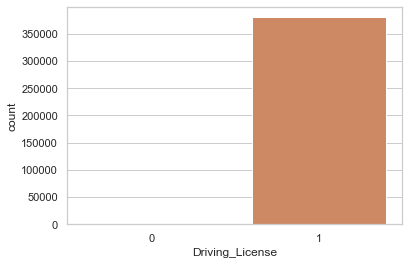

In [62]:
sns.countplot(x=df['Driving_License'])

* most of the clinents have driving license
* lets take a look at the clints who have no Driving License and there Respose = 1 to make sure the data is going right 

In [64]:
df[(df['Driving_License']==0) & (df['Response']==1) ].head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
9257,Female,53,0,8.0,0,1-2 Year,Yes,39478.0,25.0,234,1
20930,Female,44,0,3.0,0,1-2 Year,Yes,35644.0,26.0,272,1
26167,Male,63,0,28.0,0,1-2 Year,Yes,2630.0,122.0,44,1
30954,Male,45,0,28.0,0,1-2 Year,Yes,51397.0,124.0,43,1
35296,Female,67,0,28.0,0,1-2 Year,Yes,56891.0,26.0,42,1
45454,Male,61,0,8.0,0,1-2 Year,Yes,2630.0,26.0,76,1
46300,Female,69,0,28.0,0,1-2 Year,Yes,31145.0,122.0,82,1
48342,Male,55,0,29.0,0,1-2 Year,Yes,2630.0,26.0,232,1
53512,Male,59,0,8.0,0,1-2 Year,Yes,47979.0,26.0,212,1
65304,Male,50,0,43.0,0,1-2 Year,Yes,39319.0,124.0,54,1


### (4/11) - Region_Code

In [23]:
df['Region_Code'].to_list()

[28.0,
 3.0,
 28.0,
 11.0,
 41.0,
 33.0,
 11.0,
 28.0,
 3.0,
 6.0,
 35.0,
 50.0,
 15.0,
 28.0,
 28.0,
 6.0,
 45.0,
 35.0,
 28.0,
 33.0,
 28.0,
 28.0,
 50.0,
 28.0,
 15.0,
 28.0,
 28.0,
 6.0,
 8.0,
 11.0,
 8.0,
 28.0,
 28.0,
 36.0,
 30.0,
 36.0,
 8.0,
 28.0,
 8.0,
 41.0,
 30.0,
 28.0,
 41.0,
 35.0,
 30.0,
 28.0,
 15.0,
 26.0,
 15.0,
 3.0,
 50.0,
 16.0,
 3.0,
 41.0,
 28.0,
 47.0,
 28.0,
 28.0,
 48.0,
 3.0,
 8.0,
 50.0,
 28.0,
 19.0,
 15.0,
 30.0,
 28.0,
 28.0,
 28.0,
 41.0,
 47.0,
 11.0,
 39.0,
 28.0,
 23.0,
 26.0,
 28.0,
 33.0,
 28.0,
 37.0,
 26.0,
 28.0,
 8.0,
 5.0,
 28.0,
 17.0,
 47.0,
 23.0,
 35.0,
 36.0,
 50.0,
 30.0,
 28.0,
 41.0,
 15.0,
 30.0,
 28.0,
 28.0,
 2.0,
 7.0,
 28.0,
 3.0,
 30.0,
 8.0,
 41.0,
 28.0,
 41.0,
 29.0,
 46.0,
 35.0,
 8.0,
 46.0,
 30.0,
 30.0,
 30.0,
 46.0,
 46.0,
 27.0,
 29.0,
 25.0,
 3.0,
 28.0,
 13.0,
 18.0,
 15.0,
 28.0,
 41.0,
 25.0,
 20.0,
 41.0,
 28.0,
 28.0,
 37.0,
 49.0,
 8.0,
 41.0,
 39.0,
 36.0,
 28.0,
 29.0,
 46.0,
 41.0,
 28.0,
 46.0,
 3.0,
 28.0,
 

In [37]:
R_C=df['Region_Code'].unique()
print('Region code unique number=',len(R_C),'\n',R_C)


Region code unique number= 53 
 [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]


In [52]:
df['Region_Code'].value_counts().sort_values(ascending=False).head(10)

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
Name: Region_Code, dtype: int64

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

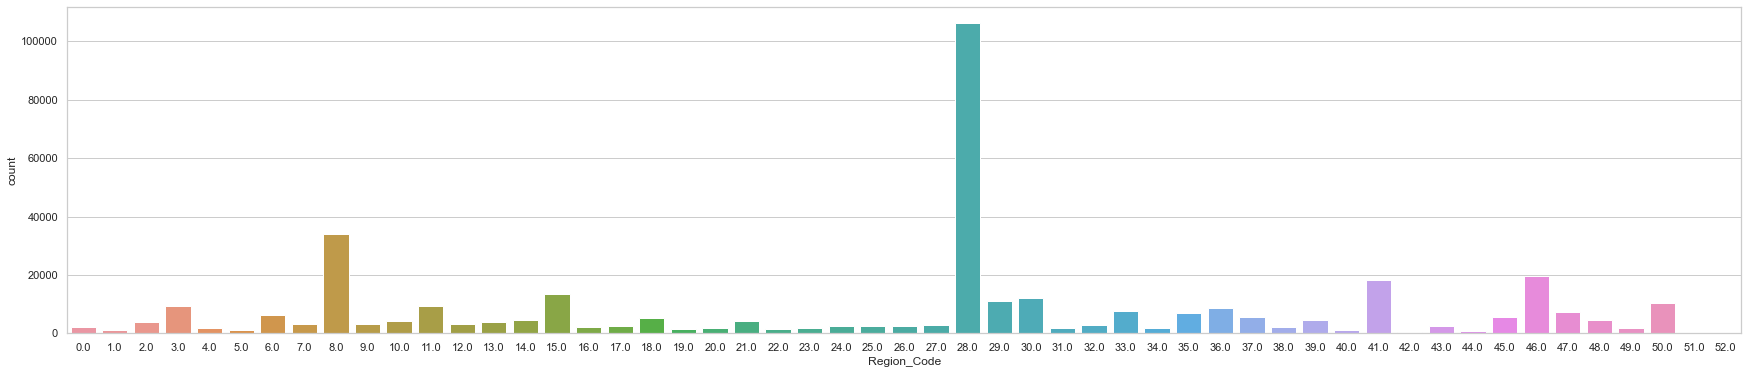

In [58]:
plt.figure(figsize=(30,6))
sns.countplot(x=df['Region_Code'])

* most of the clinets living the region code no. 28

### (5/11) - Previously_Insured

In [68]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

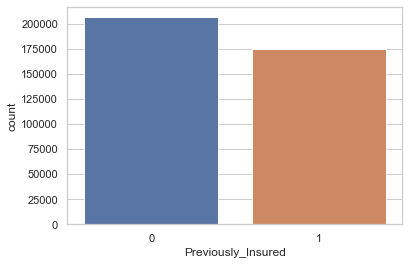

In [69]:
sns.countplot(x=df['Previously_Insured'])

* the percentage of the clients who dont have previous vehicle insurance before is a little biger then thos who had

### (6/11) - Vehicle_Age

In [70]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

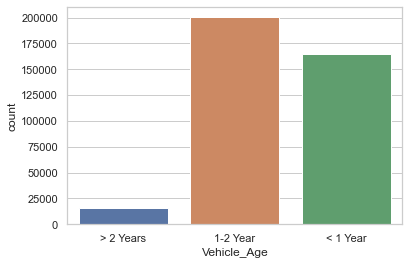

In [71]:
sns.countplot(x=df['Vehicle_Age'])

 * most of the Vehicle ages owned by the clinets is less than one up to 2 years

### (7/11) - Vehicle_Damage

In [73]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

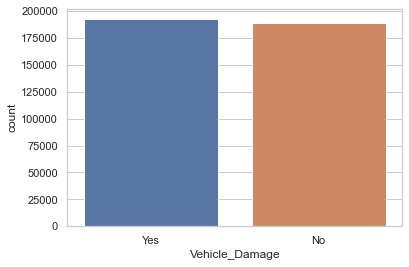

In [74]:
sns.countplot(x=df['Vehicle_Damage'])

* the percentage of who had care damage to those who had not is 50 %

### (8/11) - Annual_Premium

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

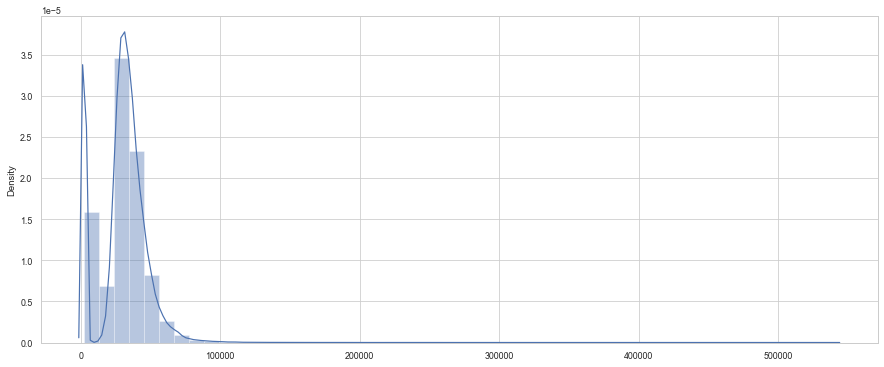

In [22]:
plt.figure(figsize=(15,6))
sns.distplot(x=df['Annual_Premium'])

<AxesSubplot:xlabel='Annual_Premium'>

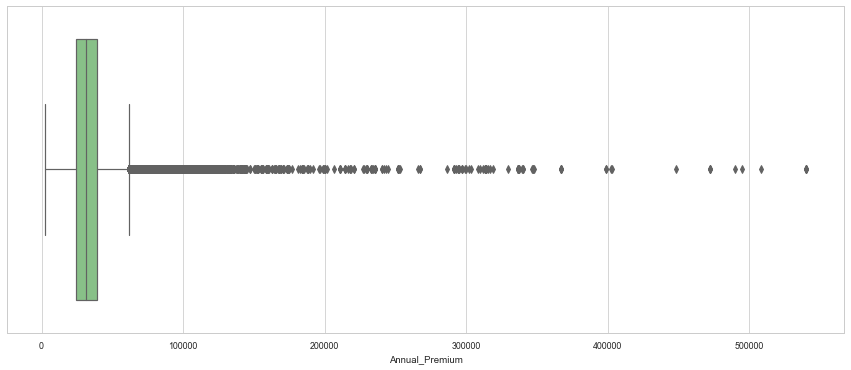

In [23]:
plt.figure(figsize=(15,6))

sns.boxplot(x = 'Annual_Premium', data = df ,palette='Accent')

* most of the clinets pay avarage 50000$ for insurace per year

### (9/11) - Policy_Sales_Channel

In [56]:
df['Policy_Sales_Channel'].describe()

count    381109.000000
mean        112.034295
std          54.203995
min           1.000000
25%          29.000000
50%         133.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64

In [67]:
df['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [108]:
# the top 20 Policy Sales Channel 

P_S_C=df['Policy_Sales_Channel'].value_counts().sort_values(ascending=False).head(20)
#P_S_C=pd.DataFrame(P_S_C)
#P_S_C['C_N']=P_S_C.index
P_S_C

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
122.0      9930
157.0      6684
154.0      5993
151.0      3885
163.0      2893
13.0       1865
25.0       1848
7.0        1598
8.0        1515
30.0       1410
55.0       1264
155.0      1234
11.0       1203
1.0        1074
52.0       1055
Name: Policy_Sales_Channel, dtype: int64

### (10/11) - Vintage

Number of Days, Customer has been associated with the company

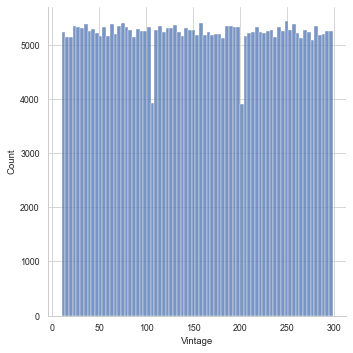

In [20]:
sns.displot(x=df['Vintage'])

* most of the clinets stays active during the year 

### (11/11) - Response

In [77]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

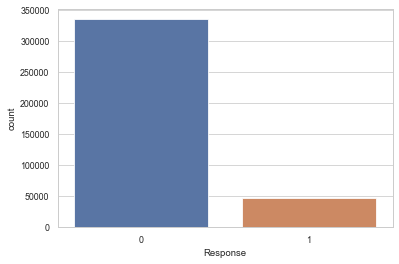

In [178]:
sns.countplot(x=df['Response'])

* the data is not balanced

## - How does gender relate to interest in vehicle insurance?

<AxesSubplot:xlabel='Gender', ylabel='count'>

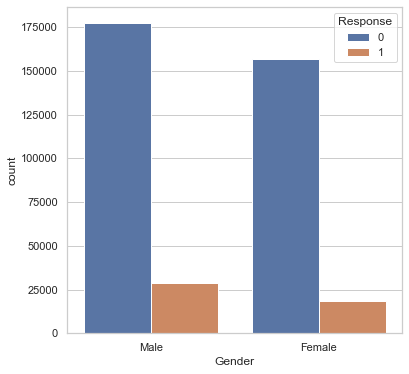

In [175]:
sns.countplot(data=df,x='Gender',hue='Response')

([<matplotlib.patches.Wedge at 0x25bf0fc5190>,
 [Text(-1.0835444727706938, -0.1895557319842357, 'Male'),
  Text(1.0835444550232005, 0.18955583343299076, 'Female')],
 [Text(-0.5910242578749239, -0.10339403562776492, '61.1%'),
  Text(0.5910242481944729, 0.1033940909634495, '38.9%')])

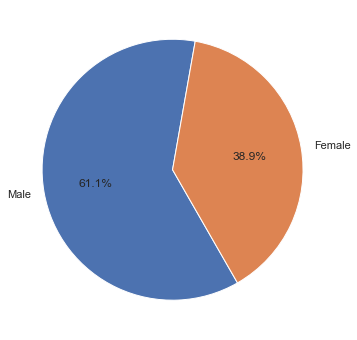

In [174]:
int_male=len(df[(df['Gender']=='Male') & (df['Response']==1)] )
int_female=len(df[(df['Gender']=='Female') & (df['Response']==1)] )

data=[int_male,int_female]
labels=['Male','Female']

plt.figure(figsize=(6,6))
plt.pie(data,labels=labels,startangle=80,autopct='%1.1f%%')

* Males are more interested in vechicle insurance as shown in the piechart 

## - What is the relationship between age and interest in vehicle insurance ?

<AxesSubplot:xlabel='Age', ylabel='count'>

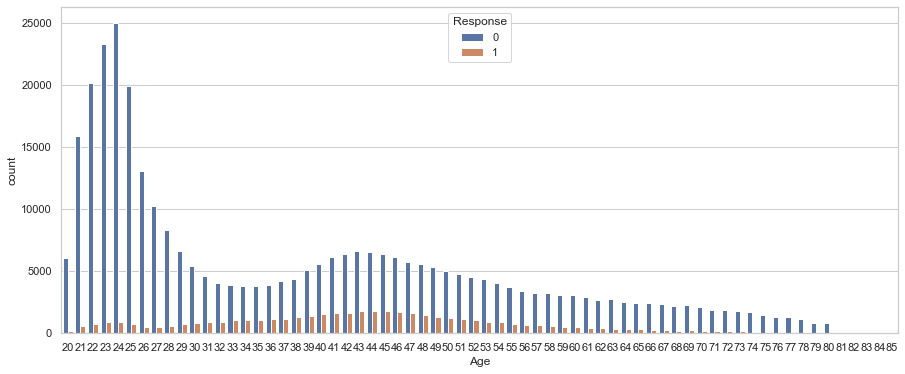

In [138]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Age',hue='Response')

* The top age that is intersted in vehicle insurance is between 43 and 45

## - How does vehicle damage history relate to interest in vehicle insurance?

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

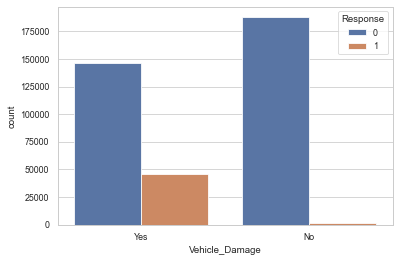

In [183]:
sns.countplot(data=df,x='Vehicle_Damage',hue='Response')

# Regional differences in interest in vehicle insurance, considering age

<AxesSubplot:xlabel='Region_Code', ylabel='Age'>

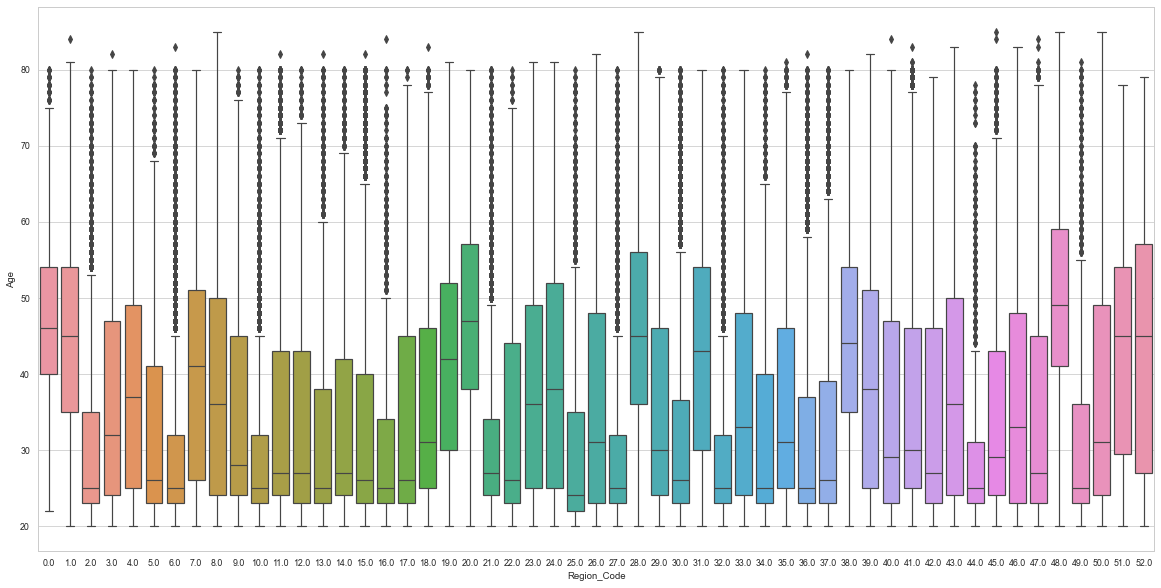

In [199]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Age', x='Region_Code', data=df)

In [218]:
df.groupby(['Region_Code','Response'])[['Age']].mean().sort_values(by='Age',ascending=False).head(20)


,,Age
Region_Code,Response,
48.0,0,50.024500
0.0,1,49.270115
52.0,1,47.969697
0.0,0,47.863563
20.0,0,47.571846
48.0,1,47.559748
51.0,1,46.535714
28.0,0,46.337175
20.0,1,46.062780


### The Age vs the amount of Annual_premium in the health insurance and who responded for the Vehicle insurance 

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

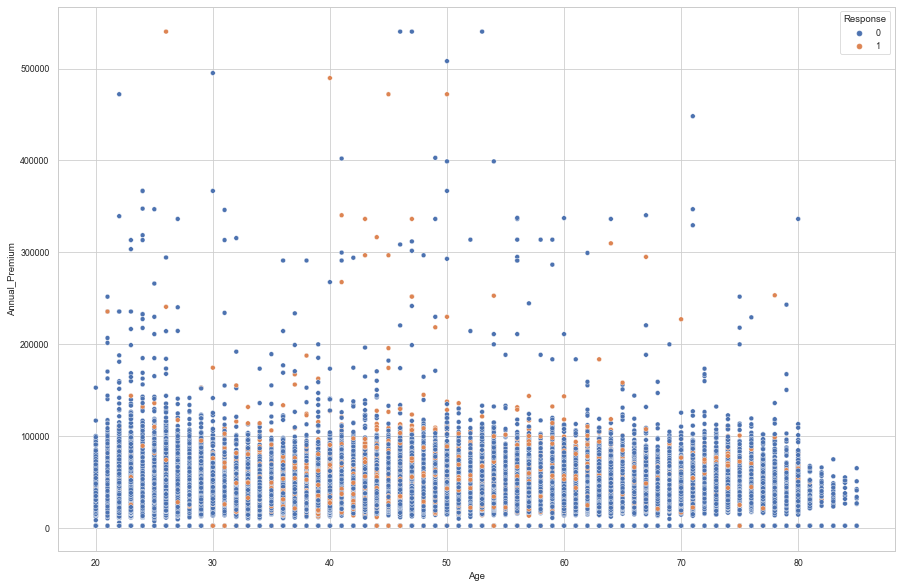

In [12]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Age'],y=df['Annual_Premium'],hue=df['Response'])

# Corrolation between features

In [179]:
df.corr()['Response']

Age                     0.111147
Driving_License         0.010155
Region_Code             0.010570
Previously_Insured     -0.341170
Annual_Premium          0.022575
Policy_Sales_Channel   -0.139042
Vintage                -0.001050
Response                1.000000
Name: Response, dtype: float64

<AxesSubplot:>

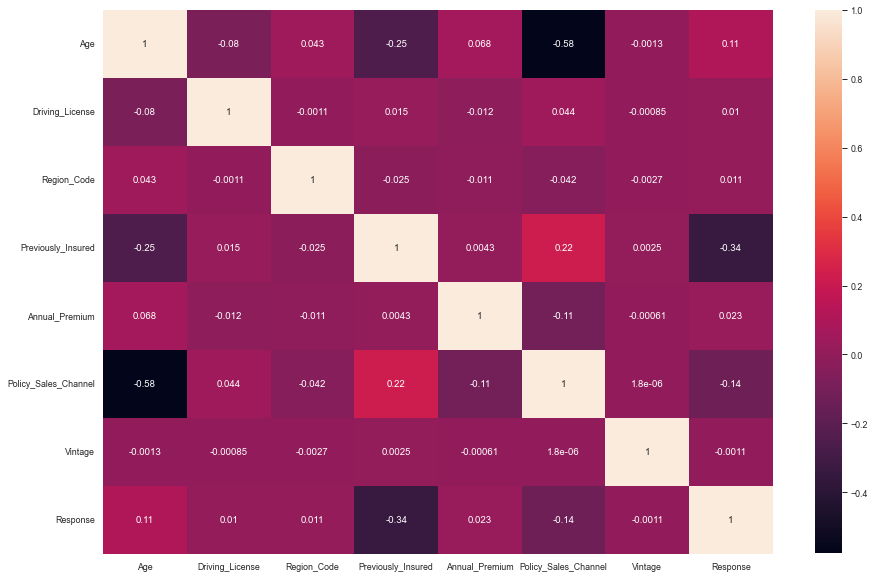

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

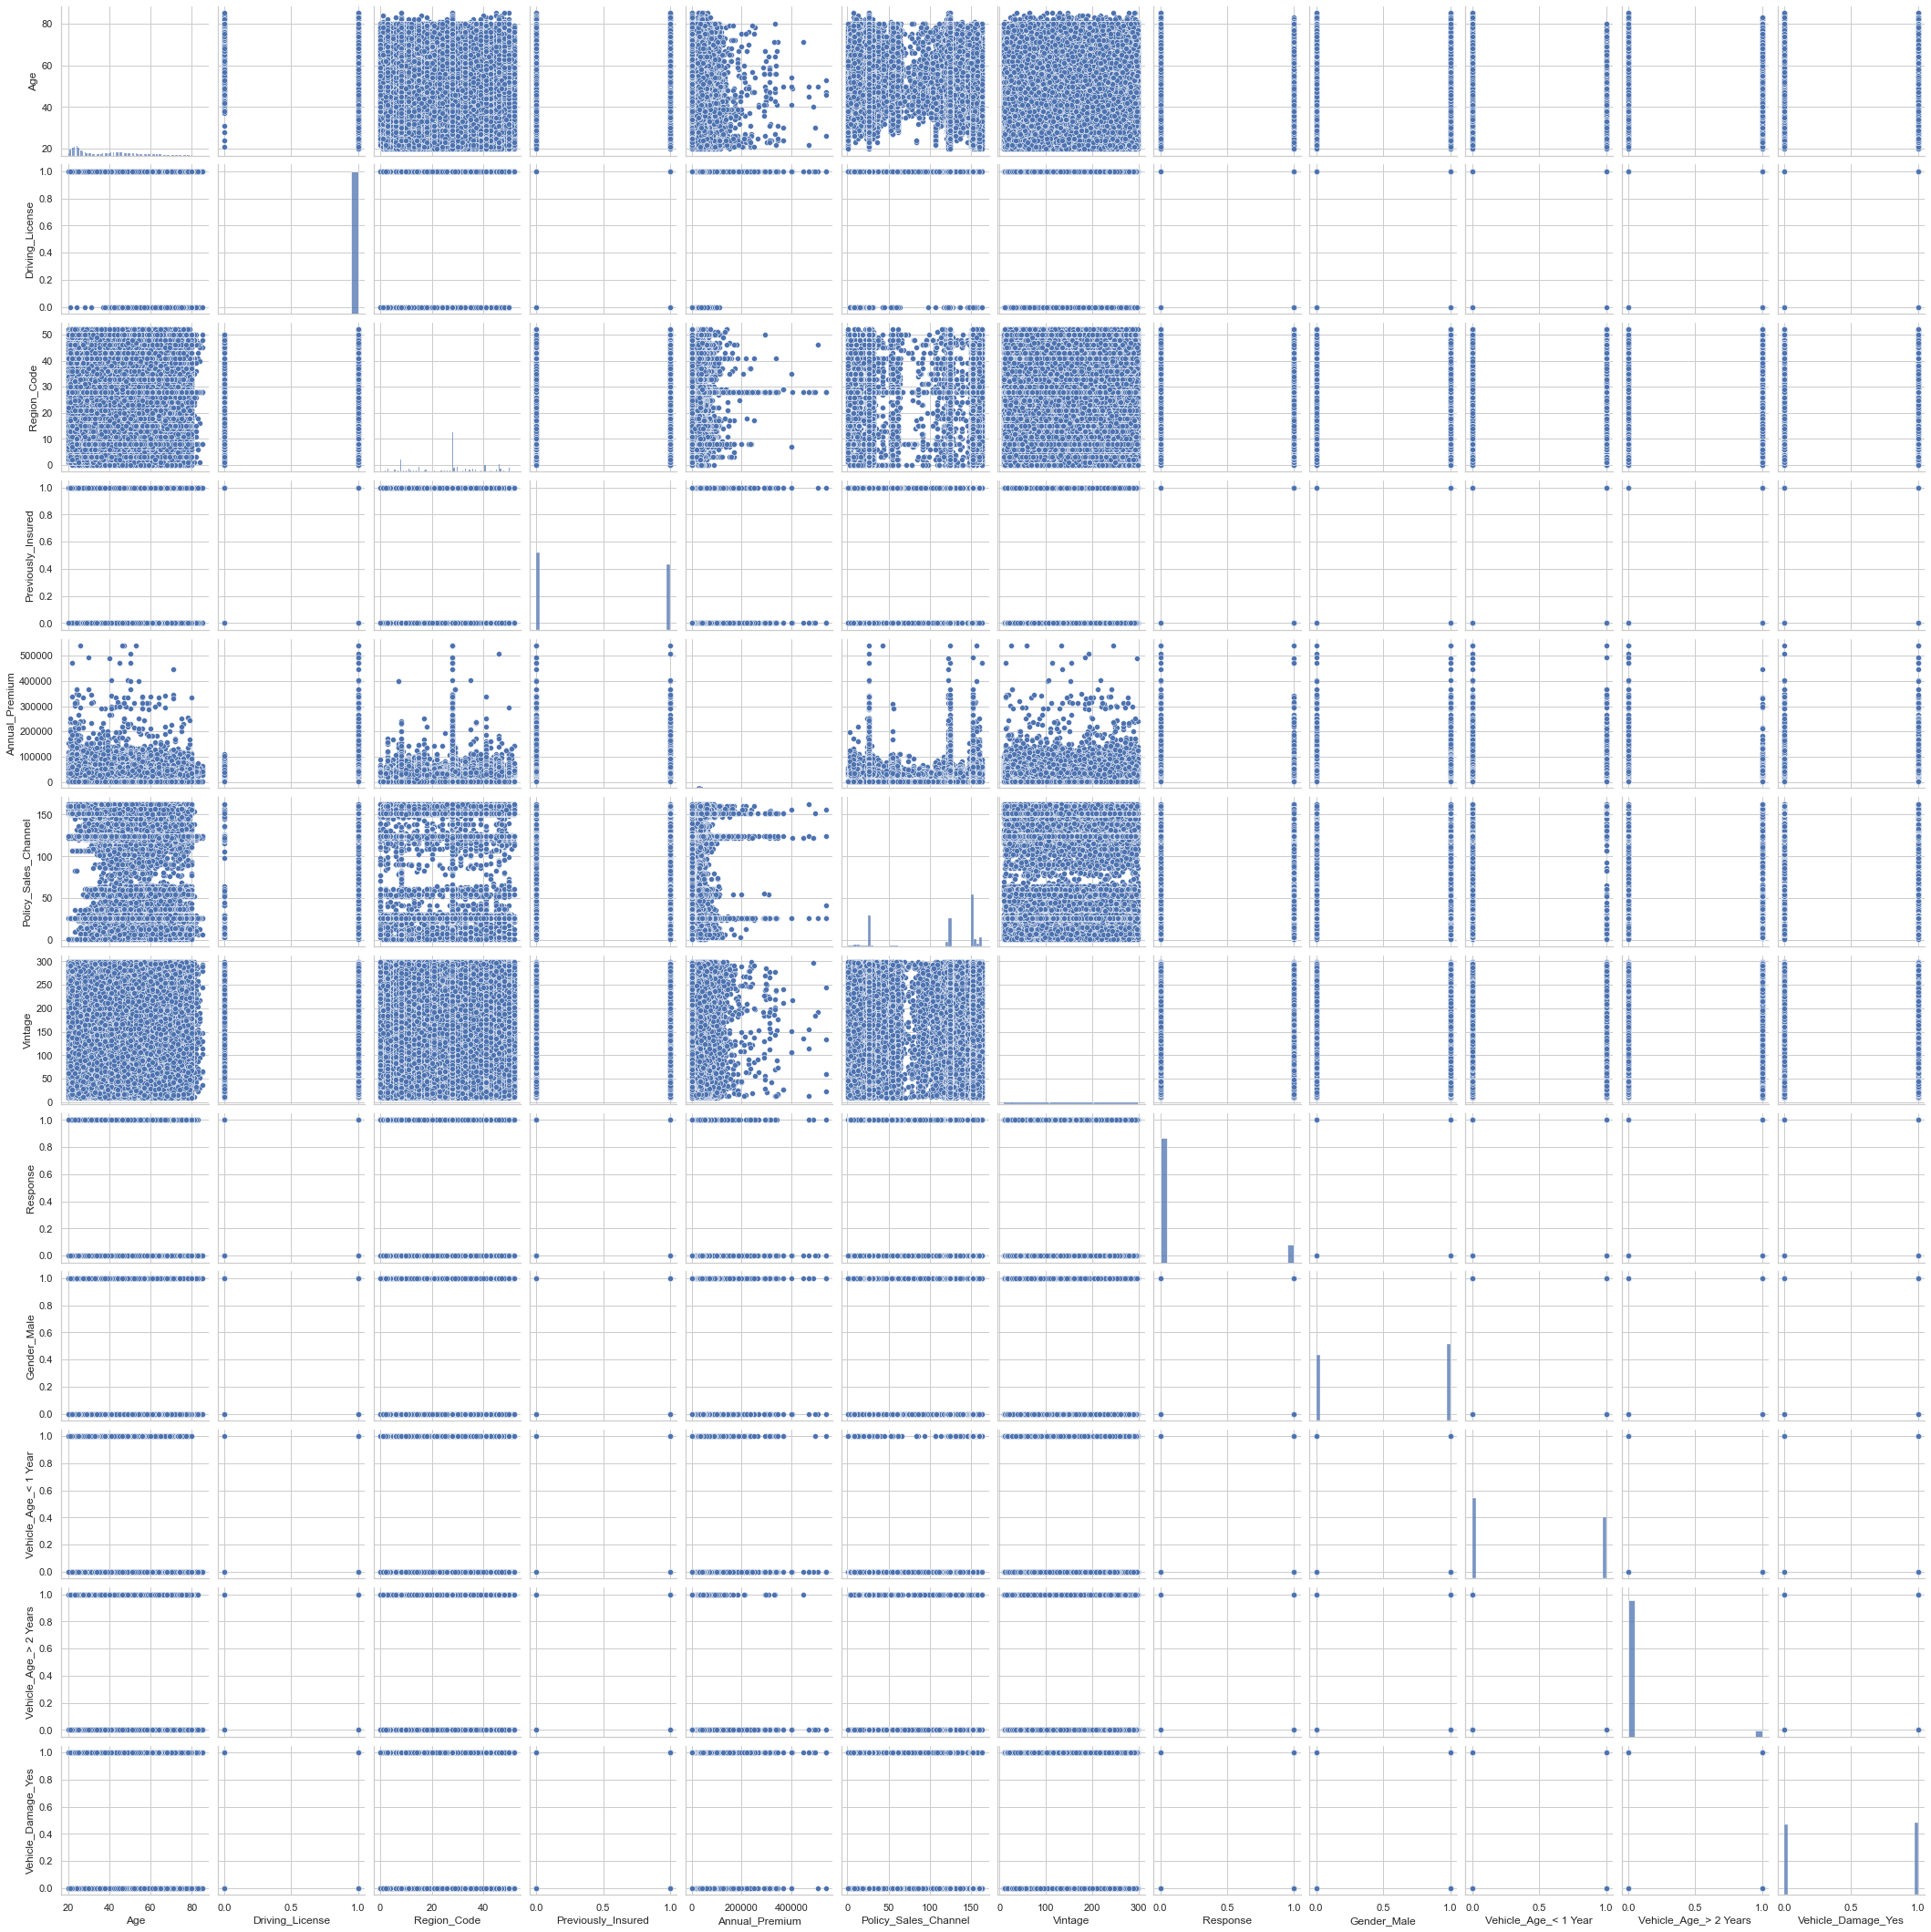

In [142]:
sns.pairplot(df)